In [1]:
import pandas_datareader.data as web
# 第一個數據
predict_days = 6 # 用過去七天預測下一天
df = web.DataReader('2330.tw', 'yahoo', '1999-01-01', '2020-06-15')
data = df.reset_index()
data['TickerId']   = '2330'
data['TickerName'] = '台積電'
data[-8:]

C:\python37\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Date   High    Low   Open  Close      Volume  Adj Close TickerId  \
5029 2020-06-04  306.0  304.0  305.0  306.0  46572451.0      306.0     2330   
5030 2020-06-05  312.0  308.0  308.5  311.5  42981262.0      311.5     2330   
5031 2020-06-08  319.0  315.0  316.0  318.0  50302921.0      318.0     2330   
5032 2020-06-09  319.0  314.0  316.5  319.0  36417082.0      319.0     2330   
5033 2020-06-10  324.0  318.0  319.0  322.5  39984259.0      322.5     2330   
5034 2020-06-11  327.0  318.5  325.5  320.5  50104255.0      320.5     2330   
5035 2020-06-12  317.5  312.5  313.0  316.0  45992918.0      316.0     2330   
5036 2020-06-15  317.5  308.5  316.0  309.5  50612000.0      309.5     2330   

     TickerName  
5029        台積電  
5030        台積電  
5031        台積電  
5032        台積電  
5033        台積電  
5034        台積電  
5035        台積電  
5036        台積電

In [2]:
data[:10]

Date       High        Low       Open      Close        Volume  \
0 2000-01-04  69.649002  68.475197  69.649002  69.649002  2.006623e+11   
1 2000-01-05  71.214104  68.866302  69.649002  71.214104  4.024668e+11   
2 2000-01-06  71.214104  69.649002  70.822899  69.649002  1.975457e+11   
3 2000-01-07  68.475197  66.518600  67.301300  67.692497  2.352703e+11   
4 2000-01-10  70.431396  68.475197  69.649002  70.040199  2.761717e+11   
5 2000-01-11  71.605202  68.475197  70.822899  68.866302  2.777695e+11   
6 2000-01-12  70.822899  68.866302  69.257500  70.822899  2.162468e+11   
7 2000-01-13  70.822899  69.649002  70.822899  69.649002  1.474909e+11   
8 2000-01-14  72.387901  70.040199  70.431396  71.214104  2.883189e+11   
9 2000-01-17  74.344398  73.170601  74.344398  73.170601  1.552569e+11   

   Adj Close TickerId TickerName  
0  37.328552     2330        台積電  
1  38.167374     2330        台積電  
2  37.328552     2330        台積電  
3  36.279961     2330        台積電  
4  37.538216     2330        台積電  
5  36.909061     2330        台積電  
6  37.957710     2330        台積電  
7  37.328552     2330        台積電  
8  38.167374     2330        台積電  
9  39.215965     2330        台積電

In [3]:
# 前面天數會有NAN
tsmc = data[['Close']][:100]
tsmc['t-5'] = tsmc.Close.shift(5)
tsmc['t-4'] = tsmc.Close.shift(4)
tsmc['t-3'] = tsmc.Close.shift(3)
tsmc['t-2'] = tsmc.Close.shift(2)
tsmc['t-1'] = tsmc.Close.shift(1)
tsmc['t-0'] = tsmc['Close']
tsmc.drop(columns='Close', inplace=True)
tsmc

t-5        t-4        t-3        t-2        t-1        t-0
0         NaN        NaN        NaN        NaN        NaN  69.649002
1         NaN        NaN        NaN        NaN  69.649002  71.214104
2         NaN        NaN        NaN  69.649002  71.214104  69.649002
3         NaN        NaN  69.649002  71.214104  69.649002  67.692497
4         NaN  69.649002  71.214104  69.649002  67.692497  70.040199
..        ...        ...        ...        ...        ...        ...
95  75.518303  73.561798  70.040199  72.387901  70.619301  74.876297
96  73.561798  70.040199  72.387901  70.619301  74.876297  79.634399
97  70.040199  72.387901  70.619301  74.876297  79.634399  81.638100
98  72.387901  70.619301  74.876297  79.634399  81.638100  81.137001
99  70.619301  74.876297  79.634399  81.638100  81.137001  79.133797

[100 rows x 6 columns]

In [4]:
# 後面天數 會有NAN
tsmc = data[['Close']][:100]
tsmc['Close+1'] = tsmc.Close.shift(-1)
tsmc['Close+2'] = tsmc.Close.shift(-2)
tsmc['Close+3'] = tsmc.Close.shift(-3)
tsmc['Close+4'] = tsmc.Close.shift(-4)
tsmc['Close+5'] = tsmc.Close.shift(-5)
tsmc[:]

Close    Close+1    Close+2    Close+3    Close+4    Close+5
0   69.649002  71.214104  69.649002  67.692497  70.040199  68.866302
1   71.214104  69.649002  67.692497  70.040199  68.866302  70.822899
2   69.649002  67.692497  70.040199  68.866302  70.822899  69.649002
3   67.692497  70.040199  68.866302  70.822899  69.649002  71.214104
4   70.040199  68.866302  70.822899  69.649002  71.214104  73.170601
..        ...        ...        ...        ...        ...        ...
95  74.876297  79.634399  81.638100  81.137001  79.133797        NaN
96  79.634399  81.638100  81.137001  79.133797        NaN        NaN
97  81.638100  81.137001  79.133797        NaN        NaN        NaN
98  81.137001  79.133797        NaN        NaN        NaN        NaN
99  79.133797        NaN        NaN        NaN        NaN        NaN

[100 rows x 6 columns]

In [5]:
# 樣本SAMPLE
from pandas import DataFrame
df = DataFrame()
df['t'] = [x for x in range(10)]
df['t-5'] = df.t.shift(5)
df['t-4'] = df.t.shift(4)
df['t-3'] = df.t.shift(3)
df['t-2'] = df.t.shift(2)
df['t-1'] = df.t.shift(1)
df['t-0'] = df['t']
df.drop(columns='t', inplace=True)
df

t-5  t-4  t-3  t-2  t-1  t-0
0  NaN  NaN  NaN  NaN  NaN    0
1  NaN  NaN  NaN  NaN  0.0    1
2  NaN  NaN  NaN  0.0  1.0    2
3  NaN  NaN  0.0  1.0  2.0    3
4  NaN  0.0  1.0  2.0  3.0    4
5  0.0  1.0  2.0  3.0  4.0    5
6  1.0  2.0  3.0  4.0  5.0    6
7  2.0  3.0  4.0  5.0  6.0    7
8  3.0  4.0  5.0  6.0  7.0    8
9  4.0  5.0  6.0  7.0  8.0    9

In [6]:
# 樣本變更台積電數據 製作成前五天預測下一天 

from pandas import DataFrame
df = DataFrame()
df['t'] = [x for x in range(10)]
df['t+1'] = df.t.shift(-1)
df['t+2'] = df.t.shift(-2)
df

t  t+1  t+2
0  0  1.0  2.0
1  1  2.0  3.0
2  2  3.0  4.0
3  3  4.0  5.0
4  4  5.0  6.0
5  5  6.0  7.0
6  6  7.0  8.0
7  7  8.0  9.0
8  8  9.0  NaN
9  9  NaN  NaN

In [7]:
# 自己寫一個函數
# series_to_supervised()
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# 驗證台積電數據
# 前面幾次的數據 n_in 去預測後面幾次的數據 n_out
values = data.Close.tolist()
data2 = series_to_supervised(values, n_in=predict_days, n_out=1, dropnan=True) #*************優化過去幾天 預測下一天

In [8]:
data2

var1(t-6)   var1(t-5)   var1(t-4)   var1(t-3)   var1(t-2)   var1(t-1)  \
6      69.649002   71.214104   69.649002   67.692497   70.040199   68.866302   
7      71.214104   69.649002   67.692497   70.040199   68.866302   70.822899   
8      69.649002   67.692497   70.040199   68.866302   70.822899   69.649002   
9      67.692497   70.040199   68.866302   70.822899   69.649002   71.214104   
10     70.040199   68.866302   70.822899   69.649002   71.214104   73.170601   
...          ...         ...         ...         ...         ...         ...   
5032  295.500000  296.500000  301.000000  306.000000  311.500000  318.000000   
5033  296.500000  301.000000  306.000000  311.500000  318.000000  319.000000   
5034  301.000000  306.000000  311.500000  318.000000  319.000000  322.500000   
5035  306.000000  311.500000  318.000000  319.000000  322.500000  320.500000   
5036  311.500000  318.000000  319.000000  322.500000  320.500000  316.000000   

         var1(t)  
6      70.822899  
7      69.649002  
8      71.214104  
9      73.170601  
10     71.996696  
...          ...  
5032  319.000000  
5033  322.500000  
5034  320.500000  
5035  316.000000  
5036  309.500000  

[5031 rows x 7 columns]

In [9]:
# 提示
# 取出 X , y
X = data2.iloc[:, [0,1,2,3,4,5]].values
y = data2.iloc[:, [-1]].values
# 花五分鐘思考
# 資料切割 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4024, 6), (4024, 1), (1007, 6), (1007, 1))

In [10]:
# 建置模型
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print(reg.predict(X_test)[:3] )
print('-'*50)
print(y_test[:3])

[[44.00263745]
 [84.80597568]
 [43.23699258]]
--------------------------------------------------
[[43.96409988]
 [85.19999695]
 [43.13430023]]


In [12]:
# 預測所有數據 ???
pre_Close = reg.predict(X)
data_plot = data[:-1*predict_days].copy() #****************************根據   優化過去幾天 預測下一天  而變動
data_plot['pre_Close'] = pre_Close
data_plot[:3]

Date       High        Low       Open      Close        Volume  \
0 2000-01-04  69.649002  68.475197  69.649002  69.649002  2.006623e+11   
1 2000-01-05  71.214104  68.866302  69.649002  71.214104  4.024668e+11   
2 2000-01-06  71.214104  69.649002  70.822899  69.649002  1.975457e+11   

   Adj Close TickerId TickerName  pre_Close  
0  37.328552     2330        台積電  69.047805  
1  38.167374     2330        台積電  70.800570  
2  37.328552     2330        台積電  69.832525

In [13]:
# 預測 與 實際的金額差異
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,3))
plt.hist( data_plot.Close - data_plot.pre_Close )
plt.show()

In [14]:
# 預測 與 實際的金額差異
import matplotlib.pyplot as plt
plt.figure(figsize=(12,3))
plt.hist( (data_plot.Close - data_plot.pre_Close) / data_plot.Close * 100 )
plt.show()

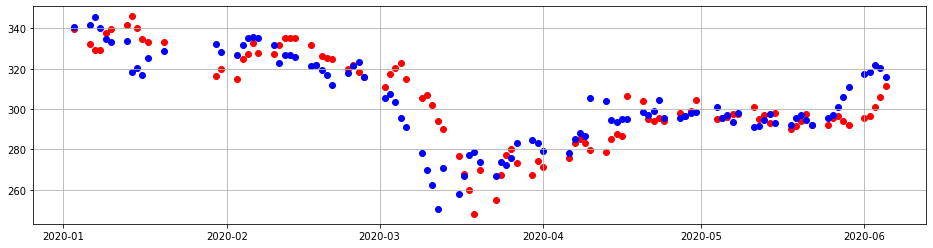

In [15]:
# 檢視預測狀況

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
last_days = -100
plt.figure(figsize=(16,4))
plt.grid()
plt.scatter(pd.to_datetime(data_plot[last_days:].Date), data_plot[last_days:].Close, color='red')

plt.scatter(pd.to_datetime(data_plot[last_days:].Date), data_plot[last_days:].pre_Close, color='blue')
plt.show()

In [16]:
# 檢視預測狀況

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.grid()
plt.plot(pd.to_datetime(data_plot.Date), data_plot.Close, color='red')
plt.show()

plt.figure(figsize=(16,4))
plt.grid()
plt.plot(pd.to_datetime(data_plot.Date), data_plot.pre_Close, color='blue')
plt.show()

In [21]:
# mse 
# mean sqr error
# (predict - truth) ** 2 / n
# 這是預測數據
import numpy as np
np.sum((data_plot.pre_Close - data_plot.Close)**2) / len(data_plot.Close)

17.87539611480689